In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('insurance.csv')

## Cheaking first 5 rows from data set

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.shape

(1338, 7)

In [6]:
print("number of rows",data.shape[0])
print("number of columns",data.shape[1])

number of rows 1338
number of columns 7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Get Overall statistics of the data

In [9]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Converting Columns from string (sex,smoke,region) to numerical values.

In [10]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [13]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [15]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

## Store Feature matrix in X and response(Target) in y

In [17]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
X = data.drop(['charges'],axis=1)

In [19]:
y = data['charges']

In [20]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [21]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Train/Test Split
#### 1. split data into 2 parts: a training set and a testing set
#### 2. train the models on training set
#### 3. test the models on testing set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
y_train


560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

## Import the models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Model training

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rm = RandomForestRegressor()
rm.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)


GradientBoostingRegressor()

## Pediction on test data

In [27]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rm.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rm':y_pred3,'gr':y_pred4})

In [28]:
df1


,Actual,lr,svm,rm,gr
764,9095.06825,8924.407244,9548.261584,11933.228510,11001.128629
887,5272.17580,7116.295018,9492.515425,5476.325528,5840.174656
890,29330.98315,36909.013521,9648.758701,28403.280228,28001.980112
1293,9301.89355,9507.874691,9555.044136,9760.350230,9745.291602
259,33750.29180,27013.350008,9420.421978,34529.065594,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47283.384447,45431.423211
575,12222.89830,11814.555568,9625.431547,12142.176015,12465.025294
535,6067.12675,7638.107736,9504.168517,6392.803983,6974.336525
543,63770.42801,40959.081722,9605.004594,46445.004683,47862.047791


## Compare PerformanceVisually

In [29]:
import matplotlib.pyplot as plt


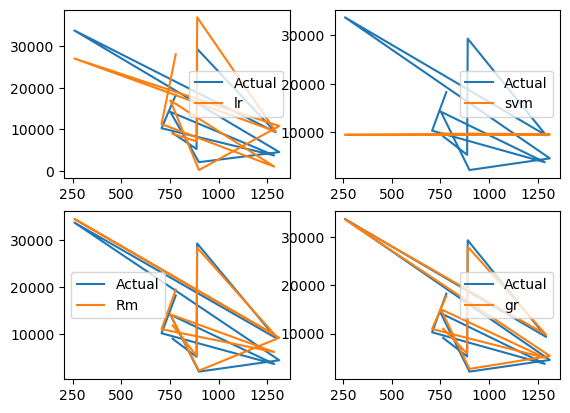

In [30]:
#plt.subplot(221)
#plt.plot(df1['Actual'].iloc[0:11],label='Actual')

plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()


plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rm'].iloc[0:11],label='Rm')
plt.legend()


plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')

plt.legend()




## Evaluating Algorithm

In [31]:
from sklearn import metrics

In [32]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8655738873178027 0.8779726251291786


In [33]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)
print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2479.1478723672276 2447.951558054584


## Predict charges for new customers

In [34]:
data = {'age':40,
        'sex':1,
        'bmi':40.30,
        'children':4,
        'smoker':1,
        'region':2}
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [35]:
new_pred = gr.predict(df)
print(new_pred)

[43013.23345491]


## Save model using joblib

In [36]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [37]:
import joblib

In [38]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [39]:
model = joblib.load('model_joblib_gr')

In [40]:
model.predict(df)

array([42148.361888])

## GUI

In [41]:
from tkinter import *

In [42]:
import joblib

In [44]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('model_joblib_gr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text = "Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)


master =Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text = "Insurance Cost Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Enter Your Age").grid(row=1)
Label(master,text = "Male Or Female [1/0]").grid(row=2)
Label(master,text = "Enter Your BMI Value").grid(row=3)
Label(master,text = "Enter Number of Children").grid(row=4)
Label(master,text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master,text = "Region [1-4]").grid(row=6)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)


Button(master,text="Predict",command=show_entry).grid()

mainloop()

C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
